# CS361 Group Assignment

Group Members: Lucy Harris (lhar917), Hayley Sharpe (hsha609), Kunal Bhaskar (kbha962), Jackson Fontaine (jfon971), Seth Gousmett (sgou398)

In [5]:
# Initialisations and imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold

# Load dataset
df = pd.read_csv("train.csv")
X = df["Text"].values
y = df["Category"].values
m = 0.9 #proportion of data for training vs validation
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=m, random_state=42, shuffle=True)

## Task 1

(a) Load the dataset and construct a feature vector for each article in the entire dataset. You
need to report the number of articles, and the number of extracted features. Show 5 example
articles with their extracted features using a dataframe.

In [9]:
def main():
    data = df
    print("Length of data: ", len(data))
    print("Number of features per example (number of extracted features):", len(data.columns))
    print("First 5 example articles:")
    print(data.head())

    words_dict, entertainment_dict, tech_dict, tech_entertainment = feature_analyse(data)

def feature_analyse(data):
    tech_dict = {}
    entertainment_dict = {}
    tech_entertainment = [0, 0]
    
    words_dict = {}
    for index, row in data.iterrows():
        words = row["Text"].split()
        category = row["Category"]

        if category == "tech":
            tech_entertainment[0] += 1

        else:
            tech_entertainment[1] += 1

        for word in words:

            if word not in tech_dict and category=="tech":
                tech_dict[word] = 1
            elif category=="tech":
                tech_dict[word] += 1

            if word not in entertainment_dict and category=="entertainment":
                entertainment_dict[word] = 1
            elif category=="entertainment":
                entertainment_dict[word] += 1
                    
            if word not in words_dict:
                words_dict[word] = 1
            else:
                words_dict[word] += 1


    return words_dict, entertainment_dict, tech_dict, tech_entertainment

main()

Length of data:  428
Number of features per example (number of extracted features): 3
First 5 example articles:
   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment


(b) Conduct term frequency analysis and report three plots: (i) top-50 term frequency distribution
across the entire dataset, (ii) term frequency distribution for respective class of articles, and (iii)
class distribution.

Length of data:  428
Number of features per example (number of extracted features): 3
First 5 example articles:
   ArticleId                                               Text       Category
0       1976  lifestyle governs mobile choice faster better ...           tech
1       1797  french honour director parker british film dir...  entertainment
2       1866  fockers fuel festive film chart comedy meet fo...  entertainment
3       1153  housewives lift channel 4 ratings debut us tel...  entertainment
4        342  u2 desire number one u2 three prestigious gram...  entertainment


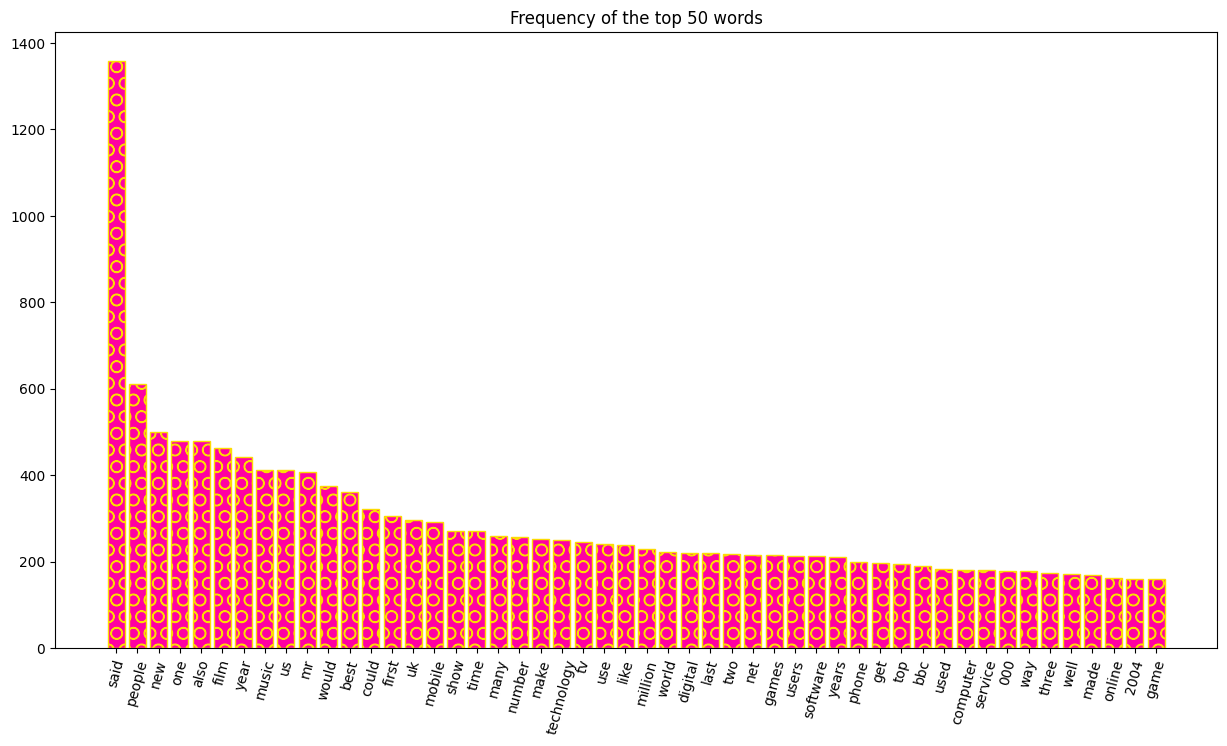

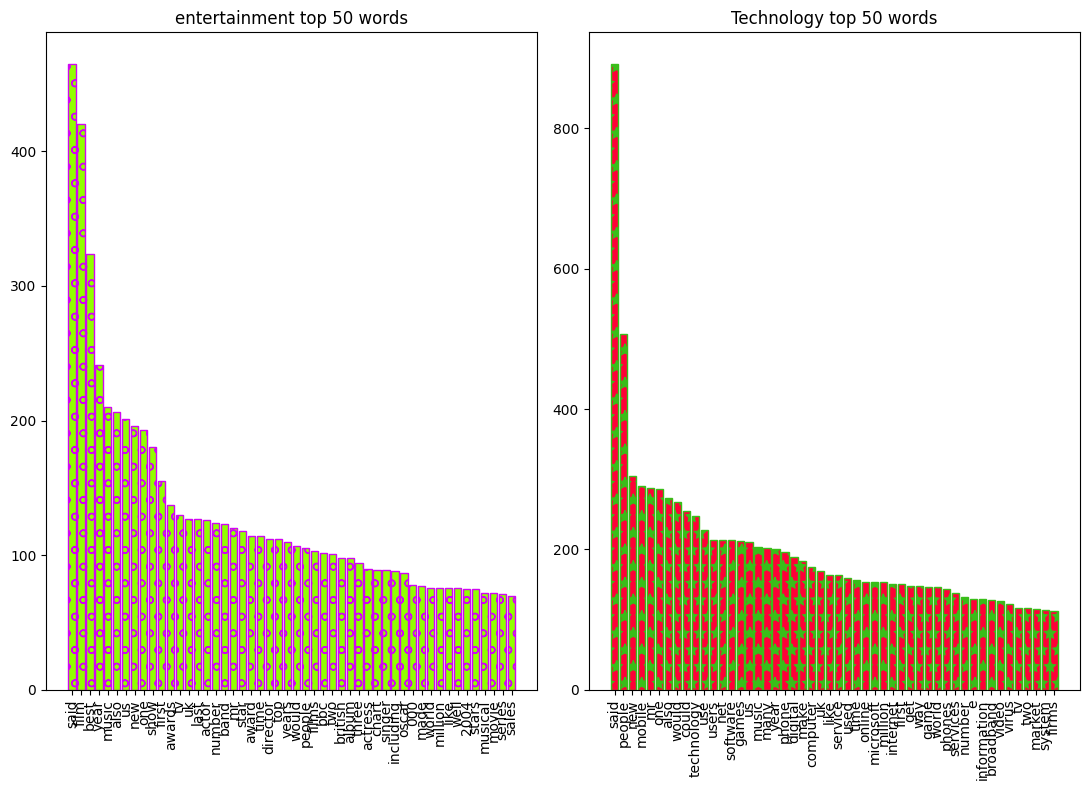

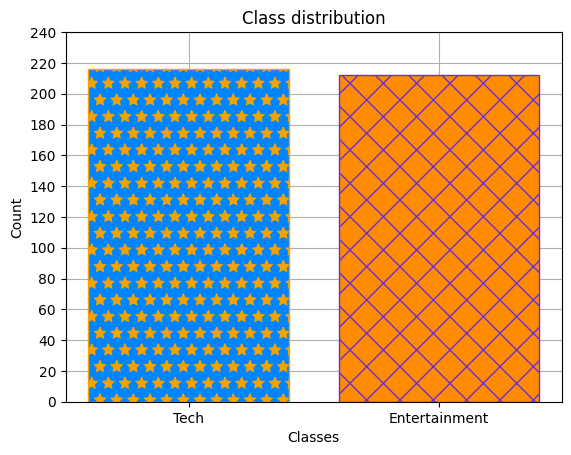

In [11]:
def main():
    data = make_df()
    print("Length of data: ", len(data))
    print("Number of features per example (number of extracted features):", len(data.columns))
    print("First 5 example articles:")
    print(data.head())

    words_dict, entertainment_dict, tech_dict, tech_entertainment = feature_analyse(data)
    
    # overall words top 50 plot
    top50_barplot(words_dict)

    top50_per_class(entertainment_dict, tech_dict)

    class_dist(tech_entertainment)

def make_df():
    df = pd.read_csv("train.csv")
    return df

# Plots the top 50 words across all training instances
def top50_barplot(words_dict):
    # list of words
    top_50_words = sorted(words_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict
    top_50_dict = dict(top_50_words)

    plt.figure(figsize=(15, 8))
    bars6 = plt.bar(top_50_dict.keys(), top_50_dict.values(), width=0.8, color = "#FF00A2", edgecolor = "#fcdb03")
    plt.xticks(rotation = 75)
    plt.title("Frequency of the top 50 words")

    pattenr = ["O"] * 50

    for bar, pattern in zip(bars6, pattenr):
        bar.set_hatch(pattern)
    
    plt.show()
    
# Plots the distribution of classes in the training dataset
def class_dist(tech_entertainment):
    fig, ax = plt.subplots()    
    
    ax.grid(True)
    ax.set_axisbelow(True)
    bars = ax.bar(["Tech",  "Entertainment"], tech_entertainment, color = ["#0084FF", "#ff8c00"], width=0.8, edgecolor = ["#f3a200", "#6b2ed7"])
    ax.set_yticks(range(0,250, 20))
    ax.set_title("Class distribution")
    ax.set_xlabel("Classes")
    ax.set_ylabel("Count")

    patterns = ["*", "x"]

    for bar, pattern in zip(bars, patterns):
        bar.set_hatch(pattern)

    plt.show()
    
# Plots the top 50 words for each of the two classes in the training dataset
def top50_per_class(entertainment_dict, tech_dict):
    top_50_words_entertainment = sorted(entertainment_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict entertainment edition
    top_50_dict_entertainment = dict(top_50_words_entertainment)

    # tech dict
    top_50_words_tech = sorted(tech_dict.items(), key = lambda item:item[1], reverse= True)[:50]

    # turning back into dict
    top_50_dict_tech = dict(top_50_words_tech)

    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(11, 8))

    #entertainment plot
    bars0 = axes[0].bar(top_50_dict_entertainment.keys(), top_50_dict_entertainment.values(), width=0.8, color = "#91FF00", edgecolor = "#d106f3")
    axes[0].set_title("entertainment top 50 words")
    axes[0].tick_params(axis = 'x', rotation = 90)
    
    #tech plot
    bars1 = axes[1].bar(top_50_dict_tech.keys(), top_50_dict_tech.values(), width=0.8, color = "#FF0037", edgecolor = "#39be19")
    axes[1].set_title("Technology top 50 words")
    axes[1].tick_params(axis = 'x', rotation = 90)

    fig.tight_layout()

    patterns = ["*"] * 50

    for bar, pattern in zip(bars1, patterns):
        bar.set_hatch(pattern)

    patterns2 = ["o"] * 50
    
    for bar, pattern in zip(bars0, patterns2):
        bar.set_hatch(pattern)
        
    plt.show()

main()

## Task 2

#### Part A - Naive Bayes

#### Part B - K-Nearest Neighbors

#### Part C - Support Vector Machine

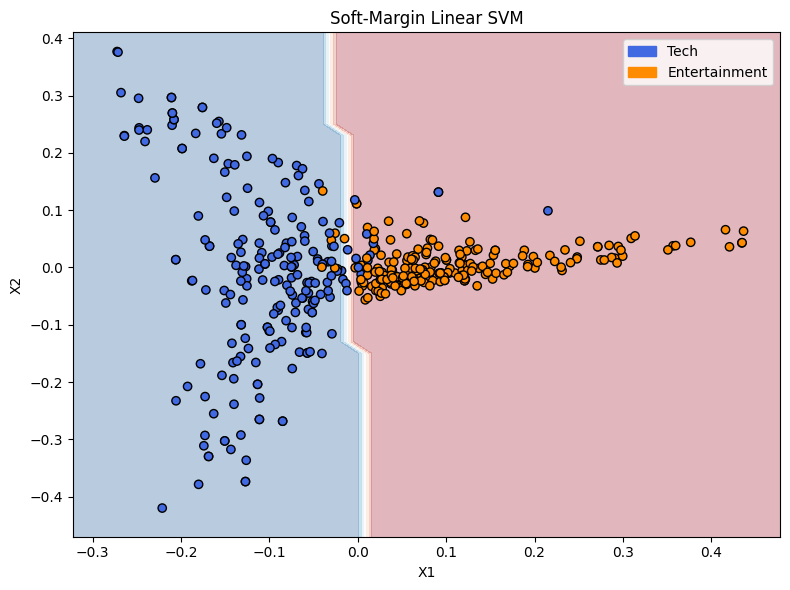

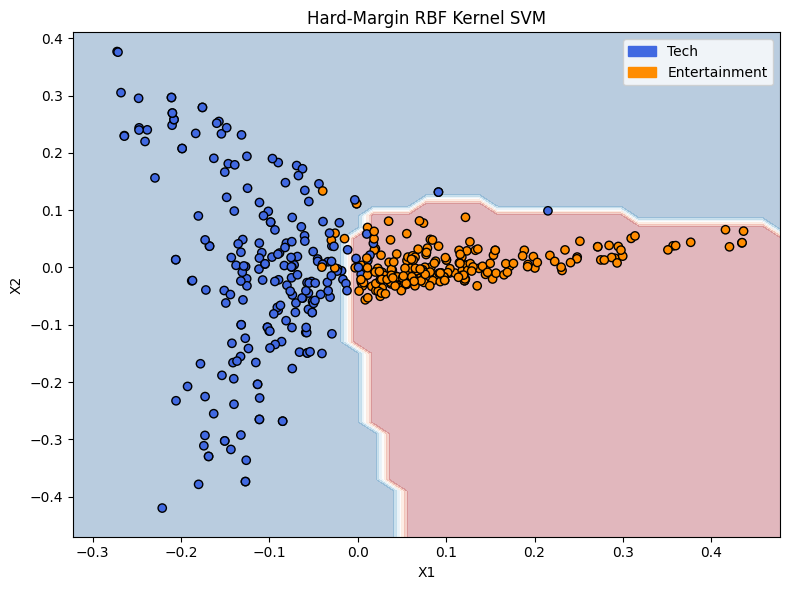

In [14]:
def main():
    # vectorise
    vectorizer = TfidfVectorizer()
    X_vec = vectorizer.fit_transform(X)

    # reduce to 2D
    pca = PCA(n_components=2)
    X_2D = pca.fit_transform(X_vec.toarray()) 

    # create soft-margin with a c penalty of 1
    model_soft = svm.SVC(kernel = 'linear', C = 1)
    model_soft.fit(X_2D, y)

    # create hard-margin with a kernel penalty of 1.5
    # set C high to represent hard-margin
    model_hard = svm.SVC(kernel = 'rbf', C = 1000, gamma = 1.5)
    model_hard.fit(X_2D, y)

    # plot the decision boundaries
    plot_decision_boundary(model_soft, X_2D, y, "Soft-Margin Linear SVM")
    plot_decision_boundary(model_hard, X_2D, y, "Hard-Margin RBF Kernel SVM")

def plot_decision_boundary(model, X_2D, y, title):
    # set up the dimensions
    h = 0.02
    padding = 0.05
    x_min, x_max = X_2D[:, 0].min() - padding, X_2D[:, 0].max() + padding
    y_min, y_max = X_2D[:, 1].min() - padding, X_2D[:, 1].max() + padding

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict directly in 2D space
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z_numeric = pd.factorize(Z)[0].reshape(xx.shape)

    y_numeric, class_names = pd.factorize(y)
    colours = ['royalblue' if label == 0 else 'darkorange' for label in y_numeric]

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z_numeric, cmap = plt.cm.RdBu_r, alpha = 0.3)
    plt.scatter(X_2D[:, 0], X_2D[:, 1], c=colours, edgecolors = 'k')

    plt.legend(handles=[
        mpatches.Patch(color='royalblue', label=class_names[0].capitalize()),
        mpatches.Patch(color='darkorange', label=class_names[1].capitalize())
    ])

    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.tight_layout()
    plt.show()

main()


#### Part D - Neural Network

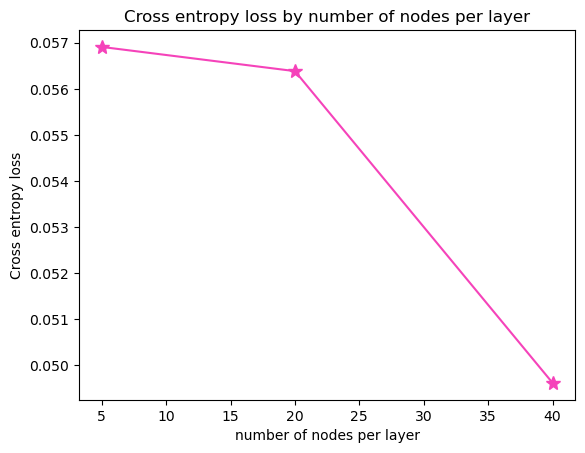

In [29]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def main():
    data = make_df("train.csv")
    y = data["Category"]
    test_data = make_df("test.csv")
    vector, vector_test = vectorize(data, test_data)

    cels = []
    num_nods = [5, 20, 40]
    for num in num_nods:
        probs, clf = make_classifier(vector, y, vector_test, num)
        cels.append(np.mean(clf.loss_curve_))

    plt.plot(num_nods, cels, marker = "*", color = "#F543BA", markersize = 10)
    plt.xlabel("number of nodes per layer")
    plt.ylabel("Cross entropy loss")
    plt.title("Cross entropy loss by number of nodes per layer")
    plt.show()
    
def vectorize(data, test_data):
    vectorizer = CountVectorizer()
    vectorizer.fit(data["Text"])
    vector = vectorizer.transform(data["Text"])
    test_vector = vectorizer.transform(test_data["Text"])
    return vector, test_vector

def make_df(filename):
    return pd.read_csv(filename)

def make_classifier(vector, y, vector_test, num_nodes = 5):
    # creating the untrained model
    clf = MLPClassifier(activation = 'relu',
                        solver = 'sgd',
                        learning_rate_init = 0.01,
                        max_iter = 100,
                        hidden_layer_sizes = (num_nodes,))

    # initialise weights
    clf.partial_fit(vector, y, classes=np.unique(y))

    # manually set weights to [0, 0.1]
    for i in range(len(clf.coefs_)):
        clf.coefs_[i] = np.random.uniform(0, 0.1, size=clf.coefs_[i].shape)
    for i in range(len(clf.intercepts_)): 
        clf.intercepts_[i] = np.random.uniform(0, 0.1, size=clf.intercepts_[i].shape)

    # training
    clf.fit(vector, y)

    probs = clf.predict_proba(vector_test)

    return probs, clf

main()

## Task 3

#### Part A - Training/Validation Proportion Parameter

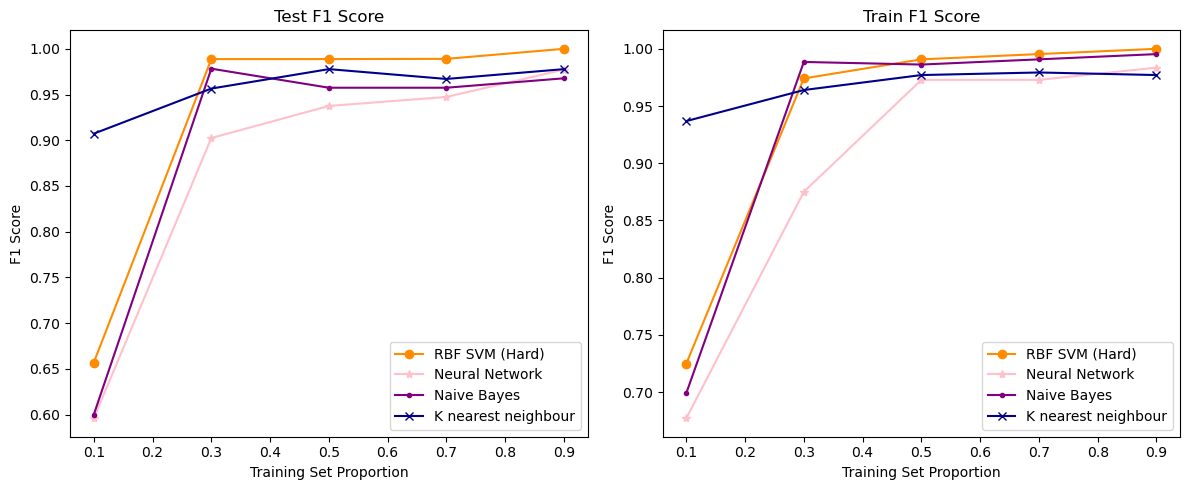

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore")

# trains for all classifiers except KNN
def train_on_m(train_y, vector, vector_test, m, y_test, clf_type):
    sub_vector = vector[0:round(vector.shape[0]*m)]
    y_sub = train_y[0:round(len(train_y)*m)]
    
    clf = make_classifier(sub_vector, y_sub, clf_type)
    
    preds_test = clf.predict(vector_test)
    preds_train = clf.predict(vector)
    
    train_f1 = calc_f1(preds_train, train_y)
    test_f1 = calc_f1(preds_test, y_test)
    return train_f1, test_f1

# trains for KNN
def train_on_m_knn(train_y, vector, vector_test, y_test, m, k, p):
    sub_X_train = vector[0:round(vector.shape[0]*m)]
    sub_y_train = train_y[0:round(len(train_y)*m)]

    knn = build_classifier(k, p, sub_X_train, sub_y_train)
    train_pred = knn.predict(vector)
    test_pred = knn.predict(vector_test)
    
    train_f1 = calc_f1(train_pred, train_y)
    test_f1 = calc_f1(test_pred, y_test)

    return train_f1, test_f1

# calculates the F1 score.
def calc_f1(preds, actual):
    tp = 0
    fp = 0
    fn = 0
    tn = 0
# tech is positive class
    for i in range(len(preds)):
        if preds[i] == "tech" and actual[i] == "tech":
            tp += 1
        elif preds[i] == "tech" and actual[i] == "entertainment":
            fp += 1
        elif preds[i] == "entertainment" and actual[i] == "entertainment":
            tn += 1
        else:
            fn += 1
    precision = tp / (tp + fp) if tp+fp >0 else 0
    recall = tp / (tp + fn) if tp+fn >0 else 0
    f1 = 2*((precision*recall) / (precision+recall)) if precision+recall > 0 else 0

    return f1

# Uses TFIDF for all models for consistency's sake.
def vectorize(data, test_data):
    vectorizer = TfidfVectorizer()
    vectorizer.fit(data["Text"])
    vector = vectorizer.transform(data["Text"])
    test_vector = vectorizer.transform(test_data["Text"])
    return vector, test_vector

# defines the classifier used for each training round for various values of m.
def make_classifier(X, y, clf_type):
    clf = ""
    if clf_type == "svm":
        clf = svm.SVC(kernel = 'rbf', C = 1000, gamma = 1)
    elif clf_type == "nn":
        clf = MLPClassifier(activation = 'relu',
                        solver = 'sgd',
                        learning_rate_init = 0.01,
                        max_iter = 100,
                        hidden_layer_sizes = (5,))
    
        clf.partial_fit(X, y, classes=np.unique(y))

    # manually set weights to [0, 0.1]
        for i in range(len(clf.coefs_)):
            clf.coefs_[i] = np.random.uniform(0, 0.1, size=clf.coefs_[i].shape)
        for i in range(len(clf.intercepts_)): 
            clf.intercepts_[i] = np.random.uniform(0, 0.1, size=clf.intercepts_[i].shape)
    elif clf_type == "knn":
        clf = build_classifier(5, 2, X, y)
    else:
        clf = MultinomialNB(alpha=1)
    clf.fit(X, y)
    return clf

# builds KNN classifier.
def build_classifier(k, p, training_vec, y):
    knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=p)
    knn.fit(training_vec, y)
    return knn

# calls other fns and generates plots for the various values of m.
def main():
    data = pd.read_csv("train.csv")
    y = data["Category"]
    test_data = pd.read_csv("test.csv")
    y_test = test_data["Category"]
    vector, vector_test = vectorize(data, test_data)

    ms = [0.1, 0.3, 0.5, 0.7, 0.9]
    svm_train_f1s = []
    svm_test_f1s = []
    nn_train_f1s = []
    nn_test_f1s = []
    nb_train_f1s = []
    nb_test_f1s = []
    knn_train_f1s = []
    knn_test_f1s = []

    for m in ms:
        svm_train, svm_test = train_on_m(y, vector, vector_test, m, y_test, 'svm')
        svm_train_f1s.append(svm_train)
        svm_test_f1s.append(svm_test)
        nn_train, nn_test = train_on_m(y, vector, vector_test, m, y_test, 'nn')
        nn_train_f1s.append(nn_train)
        nn_test_f1s.append(nn_test)
        nb_train, nb_test = train_on_m(y, vector, vector_test, m, y_test, 'nb')
        nb_train_f1s.append(nb_train)
        nb_test_f1s.append(nb_test)
        knn_train, knn_test = train_on_m_knn(y, vector, vector_test, y_test, m, 5, 2)
        knn_train_f1s.append(knn_train)
        knn_test_f1s.append(knn_test)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Test F1
    axes[0].plot(ms, svm_test_f1s, label="RBF SVM (Hard)", marker="o", color="darkorange")
    axes[0].plot(ms, nn_test_f1s, label="Neural Network", marker="*", color="pink")
    axes[0].plot(ms, nb_test_f1s, label="Naive Bayes", marker=".", color="purple")
    axes[0].plot(ms, knn_test_f1s, label="K nearest neighbour", marker="x", color="darkblue")
    axes[0].set_title("Test F1 Score")
    axes[0].set_xlabel("Training Set Proportion")
    axes[0].set_ylabel("F1 Score")
    axes[0].legend()

    # Train F1
    axes[1].plot(ms, svm_train_f1s, label="RBF SVM (Hard)", marker="o", color="darkorange")
    axes[1].plot(ms, nn_train_f1s, label="Neural Network", marker="*", color="pink")
    axes[1].plot(ms, nb_train_f1s, label="Naive Bayes", marker=".", color="purple")
    axes[1].plot(ms, knn_train_f1s, label="K nearest neighbour", marker="x", color="darkblue")
    axes[1].set_title("Train F1 Score")
    axes[1].set_xlabel("Training Set Proportion")
    axes[1].set_ylabel("F1 Score")
    axes[1].legend()

    plt.tight_layout()
    plt.show()

main()


Neural Network

#### Part B - 5-Fold Cross-Validation Model Performance Assessments

Sector Vector Machine

In [20]:
df = pd.read_csv("train.csv")
X = df["Text"]
y = df["Category"]

# Define hyperparameter values to try
kernels = ['linear', 'rbf']
C = [0.1, 0.5, 1, 5, 10, 100]
kernel_width = [0.1, 0.5, 1, 5, 10]


kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = []

for kernel in kernels:
    if kernel == 'linear':
        for cs in C:
            f1_scores = []
            for train_index, val_index in kf.split(X):
                X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

                # Vectorize
                vectorizer = TfidfVectorizer()

                X_train_vec = vectorizer.fit_transform(X_train_fold)
                X_val_vec = vectorizer.transform(X_val_fold)

                clf = svm.SVC(kernel = kernel, C = cs)
                clf.fit(X_train_vec, y_train_fold)

                # Predict and evaluate
                y_pred = clf.predict(X_val_vec)
                f1 = calc_f1(list(y_pred), list(y_val_fold))
                f1_scores.append(f1)

            avg_f1 = np.mean(f1_scores)
            results.append({
                "kernels": kernel,
                "C": cs,
                "f1_score": avg_f1
            })

    else: 
        for cs in C:
            for width in kernel_width:
                f1_scores = []

                for train_index, val_index in kf.split(X):
                    X_train_fold, X_val_fold = X.iloc[train_index], X.iloc[val_index]
                    y_train_fold, y_val_fold = y.iloc[train_index], y.iloc[val_index]

                    # Vectorize
                    vectorizer = TfidfVectorizer()

                    X_train_vec = vectorizer.fit_transform(X_train_fold)
                    X_val_vec = vectorizer.transform(X_val_fold)

                    clf = svm.SVC(kernel=kernel, C = cs, gamma = width)
                    clf.fit(X_train_vec, y_train_fold)

                    # Predict and evaluate
                    y_pred = clf.predict(X_val_vec)
                    f1 = calc_f1(list(y_pred), list(y_val_fold))
                    f1_scores.append(f1)

                avg_f1 = np.mean(f1_scores)
                results.append({
                    "kernels": kernel,
                    "kernel_width": width,
                    "C": cs,
                    "f1_score": avg_f1
                })

# Sort and display
results = sorted(results, key=lambda x: x['f1_score'], reverse=True)
for result in results:
    if result['kernels'] == 'linear':
        print(f"Kernel: {result['kernels']}, C: {result['C']}, F1 Score: {result['f1_score']:.4f}")
    else:
        print(f"Kernel: {result['kernels']}, C: {result['C']}, Kernel Width: {result['kernel_width']}, F1 Score: {result['f1_score']:.4f}")
    

Kernel: rbf, C: 1, Kernel Width: 0.5, F1 Score: 0.9908
Kernel: linear, C: 0.5, F1 Score: 0.9884
Kernel: rbf, C: 1, Kernel Width: 1, F1 Score: 0.9884
Kernel: rbf, C: 0.5, Kernel Width: 0.5, F1 Score: 0.9861
Kernel: linear, C: 1, F1 Score: 0.9860
Kernel: linear, C: 5, F1 Score: 0.9860
Kernel: linear, C: 10, F1 Score: 0.9860
Kernel: linear, C: 100, F1 Score: 0.9860
Kernel: rbf, C: 5, Kernel Width: 0.1, F1 Score: 0.9860
Kernel: rbf, C: 5, Kernel Width: 0.5, F1 Score: 0.9860
Kernel: rbf, C: 10, Kernel Width: 0.1, F1 Score: 0.9860
Kernel: rbf, C: 10, Kernel Width: 0.5, F1 Score: 0.9860
Kernel: rbf, C: 100, Kernel Width: 0.1, F1 Score: 0.9860
Kernel: rbf, C: 100, Kernel Width: 0.5, F1 Score: 0.9860
Kernel: rbf, C: 5, Kernel Width: 1, F1 Score: 0.9860
Kernel: rbf, C: 10, Kernel Width: 1, F1 Score: 0.9860
Kernel: rbf, C: 100, Kernel Width: 1, F1 Score: 0.9860
Kernel: rbf, C: 1, Kernel Width: 0.1, F1 Score: 0.9819
Kernel: rbf, C: 0.5, Kernel Width: 1, F1 Score: 0.9793
Kernel: linear, C: 0.1, F1 

Neural Network

In [21]:
from sklearn.neural_network import MLPClassifier
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings("ignore")

def vectorize(data, test_data):
    vectorizer = CountVectorizer()
    vectorizer.fit(data["Text"])
    vector = vectorizer.transform(data["Text"])
    test_vector = vectorizer.transform(test_data["Text"])

    return vector, test_vector

def make_df(filename):
    return pd.read_csv(filename)

def main():
    data = make_df("train.csv")
    y = data["Category"]
    test_data = make_df("test.csv")
    y_test = test_data["Category"]       
    vector, vector_test = vectorize(data, test_data)
    probs, model = make_classifier(vector, y, vector_test)

    cross_validate(model, vector, y, vector_test, y_test)

def make_classifier(vector, y, vector_test, num_nodes = 5):
    # creating the untrained model
    clf = MLPClassifier(activation = 'relu',
                        solver = 'sgd',
                        learning_rate_init = 0.01,
                        max_iter = 100,
                        hidden_layer_sizes = (num_nodes,))

    # initialise weights
    clf.partial_fit(vector, y, classes=np.unique(y))

    # manually set weights to [0, 0.1]
    for i in range(len(clf.coefs_)):
        clf.coefs_[i] = np.random.uniform(0, 0.1, size=clf.coefs_[i].shape)
    for i in range(len(clf.intercepts_)): 
        clf.intercepts_[i] = np.random.uniform(0, 0.1, size=clf.intercepts_[i].shape)

    # training
    clf.fit(vector, y)

    probs = clf.predict_proba(vector_test)
    return probs, clf

def cross_validate(clf, train_descriptions, train_y, test_descriptions, test_y):
    scores = cross_val_score(clf, test_descriptions, test_y, cv=5, scoring="f1_macro")
    print("Scores for normal classifier:", scores, "with average", str(sum(scores) / len(scores)))

    # calculating learning rate accuracy scores
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.75, 1, 2, 5]
    for learning_rate in learning_rates:
        # retrain clf
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = learning_rate,
                        max_iter = 100, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "learning rate", learning_rate)

    # calculating epoch count accuracy scores
    max_iter_values = [5, 50, 100, 200, 500, 1000, 5000]
    for max_iter_val in max_iter_values:
        # retrain clf
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = max_iter_val, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "max iterations", max_iter_val)

    # calculating activation function accuracy scores
    activation_functions = ["relu", "identity", "logistic", "tanh"]
    for function in activation_functions:
        # retrain clf
        clf = MLPClassifier(activation = function, solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = (5,)).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "activation function", function)

    # calculating hidden layer count accuracy scores
    num_layers = [1, 2, 3, 4, 5, 10, 20, 40]
    for num in num_layers:
        # retrain clf
        sizes = (5,) * num
        clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = 0.01,
                        max_iter = 100, hidden_layer_sizes = sizes).fit(train_descriptions, train_y)
        get_scores(clf, test_descriptions, test_y, "number of layers = ", num)

    # taking subset of the best epochs and learning rates, and finding best accuracy for this
    max_iter_values = [100, 200, 500, 1000, 5000]
    learning_rates = [0.001, 0.005, 0.01, 0.05, 0.1]
    for iter_val in max_iter_values:
        for learning_rate in learning_rates:
        # retrain clf for each combo of learning rate and max iter
            clf = MLPClassifier(activation = 'relu', solver = 'sgd', learning_rate_init = learning_rate,
                            max_iter = iter_val, hidden_layer_sizes = 2).fit(train_descriptions, train_y)
            get_scores(clf, test_descriptions, test_y, f"Max iterations = {iter_val},", f"learning rate = {learning_rate}") # change this text


def get_scores(clf, test_descriptions, test_y, hyperparam, value):
        scores = cross_val_score(clf, test_descriptions, test_y, cv=5, scoring="f1_macro")
        avg = sum(scores) / len(scores)
        # UNCOMMENT THIS PRINT TO SEE CV SCORES AND AVERAGES
        # print(f"Score for {hyperparam} {value}:", scores, "with average", str(avg))

main()

Scores for normal classifier: [1.         0.95058824 1.         0.89903846 1.        ] with average 0.9699253393665159


#### Part C - Report and Compare Classifiers